# Graph

- useful tools 
    - [NetworkX](https://networkx.org/) 
    - [NetworkX Reference-pdf](https://networkx.org/documentation/latest/_downloads/networkx_reference.pdf)
    - [github page](https://github.com/networkx/networkx) 
    - [tutorial](https://networkx.org/documentation/stable/tutorial.html)

## Graph search 
[CS 188 (2018) - Lecture 2-Uninformed Search](https://inst.eecs.berkeley.edu/~cs188/fa18/assets/slides/lec2/FA18_cs188_lecture2_uninformed_search_1pp.pdf) - page 29 

The lecture provides a uniformed view of different search stratergies such as BFS, DFS, A*, Dijkstra, Best first search, UCS, or algorithms using other heuristics. 
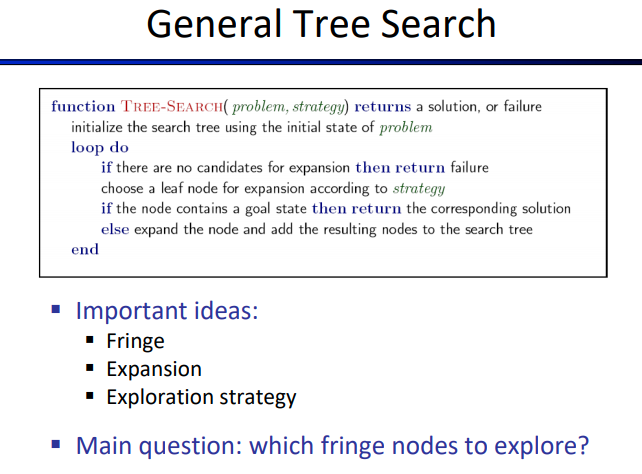


## 102. Binary Tree Level Order Traversal
[102. Binary Tree Level Order Traversal](https://leetcode.com/problems/binary-tree-level-order-traversal/)
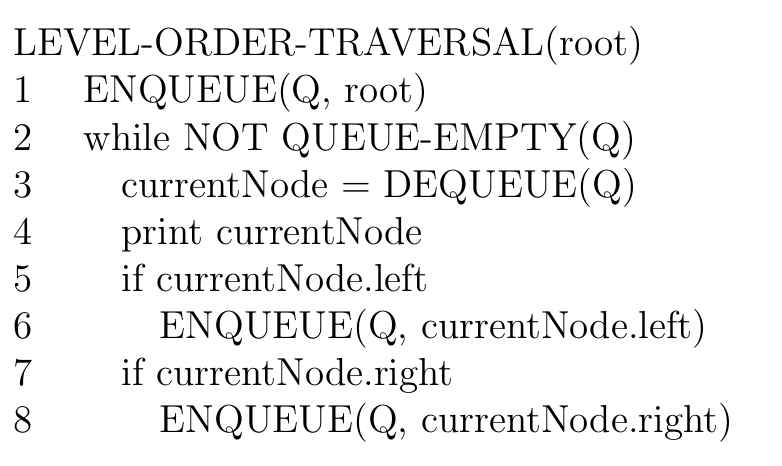

In [6]:
class Solution:
    def levelOrder(self, root): 
        if not root: 
            return [] 
        
        # BFS solution 
        q = deque([root])   # initialize using [root] or not? 
                            # has to be [root] 
        result = []   
        
        while q: 
            level = [] 
            size = len(q) 
            for _ in range(size): 
                cur = q.popleft()  
                level.append(cur.val) 
                if cur.left: 
                    q.append(cur.left) 
                if cur.right: 
                    q.append(cur.right) 
            result.append(level) 
        
        return result 

## 133. Clone Graph 
[133. Clone Graph](https://leetcode.com/problems/clone-graph/) 

http://www.lintcode.com/problem/clone-graph/

http://www.jiuzhang.com/solutions/clone-graph/

图的遍历(由点及面)

Tips: 
- get all nodes (bfs) -- copy value -- copy neighbors 


```
cur_clone.neighbors.append(clone_node[neighbor.val])
```
clone_node[neighbor.val]: new reference. 

We cannot append(neighbor) in that it's the reference of the original graph.  



In [2]:
"""
# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []
"""

class Solution:
    def cloneGraph(self, node):
        if not node: 
            return node  
        
        # get all nodes 
        all_node = self.getNode(node) 
        clone_node = {} 
        # build new node and copy value 
        for cur in all_node: 
            clone_node[cur.val] = Node(cur.val, []) 
        # copy neighbor     
        for cur in all_node: 
            cur_clone = clone_node[cur.val] 
            for neighbor in cur.neighbors: 
                cur_clone.neighbors.append(clone_node[neighbor.val])
        return clone_node[node.val]
    
    def getNode(self, node): 
        # use dfs to obtain a set of all the nodes of the graph
        q = deque([node]) 
        result = set([node]) 
        
        while q: 
            cur = q.popleft() 
            for neighbor in cur.neighbors: 
                if neighbor not in result: 
                    q.append(neighbor) 
                    result.add(neighbor) 
        return result 


## 200. Number of Islands 
[200. Number of Islands](https://leetcode.com/problems/number-of-islands/) 

Tips: 
- use bfs to mark visited islands (visited), only traverse '1'.
- the time bfs has been called is equal to the number of islands. 
- get neighbors' coordinate 
    - for delta_x, delta_y in [(1, 0), (-1, 0), (0, 1), (0, -1)]: 
- the elements of the grid are string: grid[i][j] != '0'

In [4]:
class Solution:
    def numIslands(self, grid) -> int:
        if not grid: 
            return 0 
        
        num_island = 0 
        visited = set() 
        row_len = len(grid) 
        col_len = len(grid[0]) 
        
        for i in range(row_len): 
            for j in range(col_len): 
                if grid[i][j] != '0' and (i, j) not in visited:
                    self.bfs(grid, i, j, visited) 
                    num_island += 1 
                
        return num_island 
        
    def bfs(self, grid, i, j, visited): 
        initial_state = (i, j) 
        q = deque([initial_state]) 
        visited.add(initial_state)
        while q: 
            x, y = q.popleft() 
            for delta_x, delta_y in [(1, 0), (-1, 0), (0, 1), (0, -1)]: 
                neighbor_x = x + delta_x 
                neighbor_y = y + delta_y 
                if self.isValid(neighbor_x, neighbor_y, grid, visited): 
                    visited.add((neighbor_x, neighbor_y)) 
                    q.append((neighbor_x, neighbor_y)) 

    def isValid(self, x, y, grid, visited): 
        n, m = len(grid), len(grid[0])
        return 0 <= x < n and 0 <= y < m and (x, y) not in visited and grid[x][y] != '0'  
    
a = Solution() 

    
    

## 1197. Minimum Knight Moves 
[1197. Minimum Knight Moves](https://leetcode.com/problems/minimum-knight-moves/) 


tips: 
- initial state: (0, 0) 
- return min_move + 1   

Explaination: 
The depth of bfs is equal to the length of shortest path. 

In [5]:
class Solution:
    def minKnightMoves(self, x: int, y: int) -> int:
        if x == 0 and y == 0: 
            return 0 
        
        min_move = 0 
        DIRECTIONS = [(-2, -1), (-2, 1), (-1, 2), (1, 2),
                      (2, 1), (2, -1), (1, -2), (-1, -2)]
        #[(2, 1), (1, 2), (-2, 1), (-1, 2), (2, -1), (1, -2), (-2, -1), (-1, -2)]
        q = deque([(0, 0)]) 
        visited = set() 
        visited.add((0, 0)) 
        
        while q: 
            level_size = len(q) 
            for _ in range(level_size): 
                cur_x, cur_y = q.popleft() 
                for delta_x, delta_y in DIRECTIONS: 
                    neighbor_x = cur_x + delta_x
                    neighbor_y = cur_y + delta_y 
                    if neighbor_x == x and neighbor_y == y: 
                        return min_move + 1  
                    if (neighbor_x, neighbor_y) not in visited:
                        q.append((neighbor_x, neighbor_y)) 
                        visited.add((neighbor_x, neighbor_y)) 
            min_move += 1   

## 994. Rotting Oranges 
[994. Rotting Oranges](https://leetcode.com/problems/rotting-oranges/) 




Tips: 
- q.append((-1, -1)) # mark for time steps 
- line 21: if q: 
- time_step = 0  
- no need for visited, because we update inplace: grid[neighbor_x][neighbor_y] = 2 
    - def isValid(self, x, y, grid): grid[x][y] == 1  checks if not visited implicitly. 

In [8]:
class Solution:
    def orangesRotting(self, grid) -> int:
        row_len, col_len = len(grid), len(grid[0]) 
        q = deque() 
        num_fresh = 0 
        for i in range(row_len): 
            for j in range(col_len): 
                if grid[i][j] == 2: 
                    q.append((i, j)) 
                elif grid[i][j] == 1: 
                    num_fresh += 1 
                    
        time_step = 0 
        
        q.append((-1, -1)) # mark for time steps 
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        
        while q: 
            cur_x, cur_y = q.popleft() 
            if cur_x == -1: 
                if q: 
                    # still have elements, append marks, and count time steps   
                    q.append((-1, -1))
                    time_step += 1
                # if not, this is the end. 
            else: 
                for delta_x, delta_y in directions: 
                    neighbor_x = delta_x + cur_x 
                    neighbor_y = delta_y + cur_y 
                    if self.isValid(neighbor_x, neighbor_y, grid): 
                        grid[neighbor_x][neighbor_y] = 2 
                        num_fresh -= 1 
                        q.append((neighbor_x, neighbor_y))
            
        return time_step if num_fresh == 0 else -1 
    
    def isValid(self, x, y, grid): 
        row_len, col_len = len(grid), len(grid[0]) 
        return x >= 0 and x < row_len and y >= 0 and y < col_len and grid[x][y] == 1  
        

Another solution: 
Tips: 
- corner case: if no fresh orange, return 0. 
```
        if num_fresh == 0: 
            return 0 
```
- start from -1 
```
time_step = -1 
```


In [ ]:
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        row_len, col_len = len(grid), len(grid[0]) 
        q = deque() 
        num_fresh = 0 
        for i in range(row_len): 
            for j in range(col_len): 
                if grid[i][j] == 2: 
                    q.append((i, j)) 
                elif grid[i][j] == 1: 
                    num_fresh += 1 
                    
        if num_fresh == 0: 
            return 0 
        
        time_step = -1 
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        
        while q: 
            size = len(q) 
            time_step += 1 
            for _ in range(size): 
                cur_x, cur_y = q.popleft()  
                
                for delta_x, delta_y in directions: 
                    neighbor_x = cur_x + delta_x 
                    neighbor_y = cur_y + delta_y 
                    if self.isValid(neighbor_x, neighbor_y, grid): 
                        grid[neighbor_x][neighbor_y] = 2 
                        q.append((neighbor_x, neighbor_y))
                        num_fresh -= 1 
                        
        return time_step if num_fresh == 0 else -1 
                    

    def isValid(self, x, y, grid): 
        row_len, col_len = len(grid), len(grid[0]) 
        return x >= 0 and x < row_len and y >= 0 and y < col_len and grid[x][y] == 1  
        

## 207. Course Schedule 
[207. Course Schedule](https://leetcode.com/problems/course-schedule/) 


http://www.lintcode.com/problem/course-schedule/

http://www.lintcode.com/problem/course-schedule-ii/

换了个皮,第二问需要判断是否没有拓扑序


[Introduction to Topological Sort
](https://leetcode.com/discuss/general-discussion/1078072/introduction-to-topological-sort) 

Given a directed acyclic graph (DAG), a topological sort is a linear ordering of all vertices such that for any edge (u, v), u comes before v. Another way to describe it is that when you put all vertices horizontally on a line, all of the edges are pointing from left to right. 
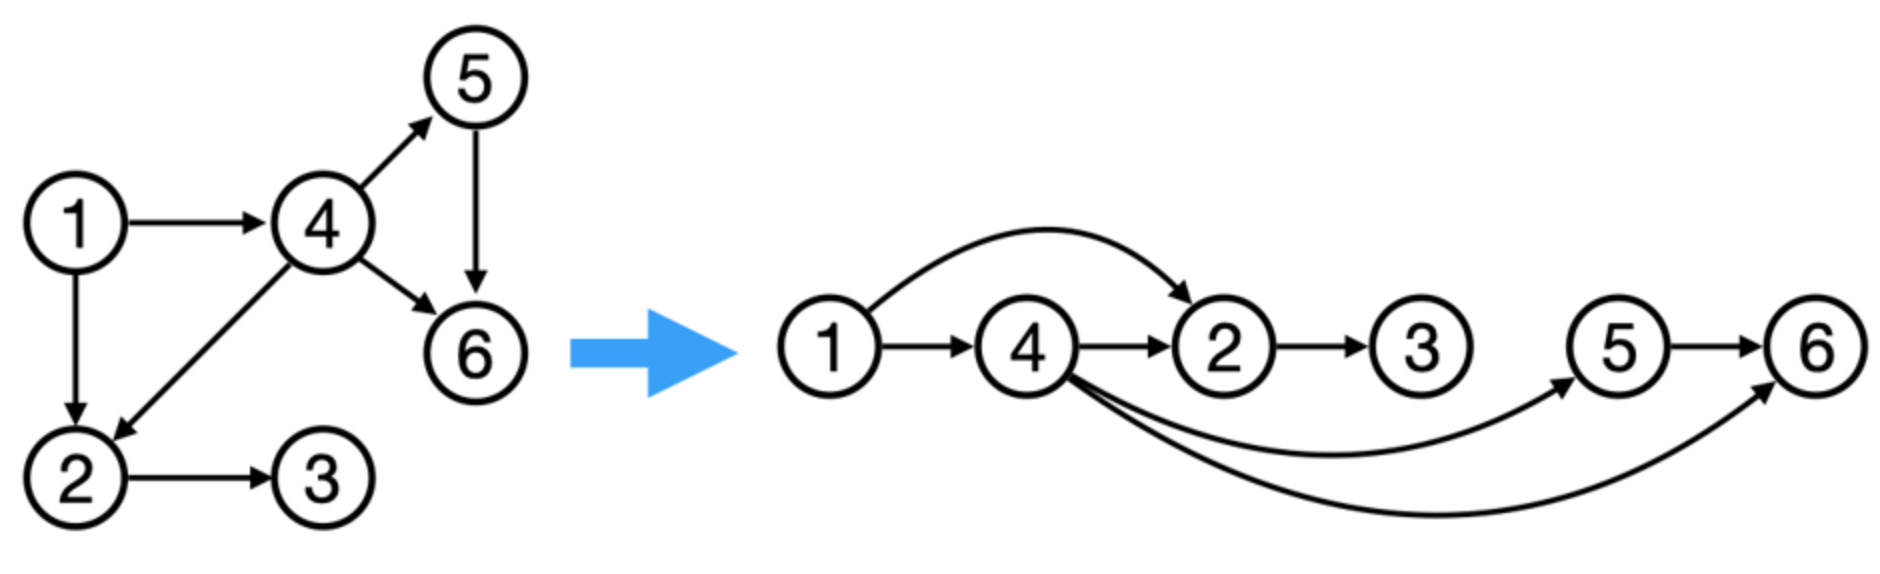


#### Tips 
-  put the nodes that become 0 indegree in the queue. 
- Notice the arrow: for t, s in prerequisites:  

In [9]:
class Solution:
    def canFinish(self, numCourses: int, prerequisites) -> bool:
        if not prerequisites:  
            return True 
        
        graph = [[] for _ in range(numCourses)] 
        inDegrees = [0 for _ in range(numCourses)] 
        
        # initialize the graph and inDegrees of each node 
        for t, s in prerequisites: 
            graph[s].append(t) 
            inDegrees[t] += 1 
            
        # bfs 
        q = deque() 
        count = 0 
        for i, inD in enumerate(inDegrees): 
            if inD == 0: 
                q.append(i) 
        while q: 
            cur = q.popleft() 
            count += 1 
            
            for x in graph[cur]: 
                inDegrees[x] -= 1 
                if inDegrees[x] == 0: 
                    q.append(x) 

        return count == numCourses 
        

### 378. Kth Smallest Element in a Sorted Matrix 
[378. Kth Smallest Element in a Sorted Matrix](https://leetcode.com/problems/kth-smallest-element-in-a-sorted-matrix/) 

```
Given an n x n matrix where each of the rows and columns is sorted in ascending order, return the kth smallest element in the matrix.
```

The naive solution would be sort the matrix first, and then return the kth element. 

https://leetcode.com/problems/kth-smallest-element-in-a-sorted-matrix/discuss/1080253/Illustration-of-Solution-with-MinHeap

https://leetcode.com/problems/kth-smallest-element-in-a-sorted-matrix/discuss/1741704/PYTHON-Heap(priority-queue)-II-very-easy-code


In [18]:
from heapq import heappush, heappop, heapify
heap = [] 
heapify(heap) 
print(heap)
heappush(heap, (3, 0, 0)) 
heappush(heap, (99, 0, 0)) 
heappush(heap, (2, 0, 0)) 

print(heap)
ele, i, j = heappop(heap)
print('pop:', ele, i, j)

ele, i, j = heappop(heap)
print('pop:', ele, i, j)
# sort according to the first element of the tuple 
# e.g., (3, 0, 0), according to 3 



[]
[(2, 0, 0), (99, 0, 0), (3, 0, 0)]
pop: 2 0 0
pop: 3 0 0


In [25]:
heap = [1, 3, 5, 6, 4, 0] 
heapify(heap) 
print(heap)
heappush(heap, 2)
# error, has to be the same type: int in this case 
# heappush(heap, (3, 0, 0))  

[0, 3, 1, 6, 4, 5]


In [26]:
class Solution:
    def kthSmallest(self, matrix, k: int) -> int:
        from heapq import heappush,heappop,heapify
        m,n=len(matrix),len(matrix[0])
        heap=[]
        s=set()
        heapify(heap)
        heappush(heap,(matrix[0][0],0,0))
        s.add((0,0))
        while k>1:
            _,i,j=heappop(heap)
            if j+1<n and (i,j+1) not in s:
                heappush(heap,(matrix[i][j+1],i,j+1))
                s.add((i,j+1))
            if i+1<m and (i+1,j) not in s:
                heappush(heap,(matrix[i+1][j],i+1,j))
                s.add((i+1,j))
            k-=1
        return heap[0][0]

## 785. Is Graph Bipartite? 
[785. Is Graph Bipartite?](https://leetcode.com/problems/is-graph-bipartite/) 


#### Tips: 
- seen stores two pieces of information: node number and group. 
- Since the graph might not be connected, we need to send each unseen node to bfs. 

In [ ]:
class Solution:
    def isBipartite(self, graph: List[List[int]]) -> bool:
        seen = {} 
        num_node = len(graph) 
        for i in range(num_node): 
            if i not in seen: 
                if self.bfs(graph, i, seen) == False: 
                    return False 
        return True 
        
    
    def bfs(self, graph, start, seen): 
        q = deque([(start, 1)])  # use 1 and -1 to represent different groups 
        
        while q: 
            node, group = q.popleft() 
            neighbors = graph[node]
            for neighbor in neighbors: 
                if neighbor not in seen: 
                    # if new, assign it to a different group 
                    seen[neighbor] = -1 * group 
                    q.append((neighbor, -1 * group)) 
                else: 
                    # seen neighbors should be in different group 
                    # to satisfy the bipartite property. 
                    if seen[neighbor] == group: 
                        return False 
        return True 

## 773. Sliding Puzzle 
[773. Sliding Puzzle](https://leetcode.com/problems/sliding-puzzle/) 

This is a search (or planning) problem with a relatively small state space, where the number of total different states is $6!=720$. Naive search algorithms such as BFS or DFS are sufficient for this problem. Let's first use BFS to solve the problem. The overall idea is as follows: 
- We first build a implicit graph. 
    - Note that this is a dynamic graph, meaning that we do not acturally store the graph explicitly; instead, we dynamically construct neighbors from a given node. 
- We then use BFS to traverse the 'graph' level by level. Each level counts for one move. 

Tips: 
- check if we reach the goal position in neighbor for loop, and return num_step + 1.  

- The overall process is pretty simple. The main function is simply a level order BFS, with get_neighbors function to be done for this particular problem.  


In [27]:
from collections import deque 
class Solution:
    def slidingPuzzle(self, board) -> int:  
        start = tuple(board[0] + board[1]) 
        goal = (1, 2, 3, 4, 5, 0) 
        
        if start == goal: 
            return 0 

        seen = set() 
        seen.add(start)
        q = deque([start]) 
        num_step = 0  
        
        while q: 
            size = len(q) 
            for _ in range(size): 
                cur = q.popleft() 
#                 print('cur:', cur)
                for neighbor in self.get_neighbors(cur): 
#                     print('neighbor:', neighbor)
                    if neighbor not in seen: 
                        if neighbor == goal: 
                            return num_step + 1 
                        seen.add(neighbor) 
                        q.append(neighbor) 
                
            num_step += 1 
        return -1 
    
    def get_neighbors(self, node): 
        res = [] 
        zero_pos = node.index(0)  # get the index of 0 in 1d array. 
        x, y = divmod(zero_pos, 3) # convert it to coordinate in 2d matrix 
        print('x, y', x, y)
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)] 
        for delta_x, delta_y in directions: 
            neighbor_x = delta_x + x
            neighbor_y = delta_y + y 
            if self.is_valid(neighbor_x, neighbor_y): 
                node_list = list(node) 
                tmp = node_list[neighbor_x * 3 + neighbor_y]  # 2d to 1d mapping 
                node_list[neighbor_x * 3 + neighbor_y] = 0 
                node_list[zero_pos] = tmp 
                
                res.append(tuple(node_list)) 
        return res 
    
    def is_valid(self, x, y): 
        len_row = 2 
        len_col = 3 
        return x >= 0 and x < len_row and y >= 0 and y < len_col

board = [[1,2,3],[4,0,5]] 
a = Solution() 
a.slidingPuzzle(board) 
            
            

x, y 1 1


1

As we have already mentioned, this is a seach problem with a small state space. Now, we ask: what if the state space is huge? For example, if this is a 15-puzzle, then the number of total different states is $16!=2.09e+13$. It is intractable to use naive search algorithms to solve this problem. To design fast and tractable algorithms, we need to come up with some heuristics to guide the agent to the right directions so that it does not need to visit all the states (in the worst case) before finding the goal state. Let's re-visit the general search framework in [CS188](https://inst.eecs.berkeley.edu/~cs188/fa18/assets/slides/lec2/FA18_cs188_lecture2_uninformed_search_1pp.pdf) [main page](https://inst.eecs.berkeley.edu/~cs188/fa18/), we need to design some distance metric to guide the agent to the right directions. However, it is not easy to come up with admissible heuristics to ensure the optimality of the algorithm. Which two states are close? Using which metric to calculate the distance? 

One promising method is to partition the state space using the concept equivalent. That is, we group equivalent (similar) states into an abstract set. In graph, we group a set of equivalent nodes into one abstract set. In this way, we can search in the reduced space (quotient space). 

The question is: what is equivalent? what is equivalence relation?  

### equivalence relation 

Let's first look at what a relation is in mathematics. Viewing relations in terms of set is crutial to understanding important mathematical concepts, opening a brand-new view of mathematics. We first look at the relation that we have known from primary school: $\lt$. For example, $3 \lt 5$, $\sqrt 3 \lt 3$. Now, let's change our view to understand it in terms of set. In essence, $\lt$ is a set, or a subset of $\mathbb{R} \times \mathbb{R}$, including 
$(3, 5)$, $(\sqrt{3}, 3)$, ...
but not $(5, 3)$, $(3, \sqrt{3})$, ...
Next, we look at the formal defination of $\textit{relation}$. 
A relation, denoted by $\sim$, on a set $S$, is a subset of $S \times S$. Since a relation is a set, we can write $(a, b) \in \sim$, or $(c, b) \notin \sim$. Thus, we can write $(3, 5) \in \lt$. Why do we use such a way to express $3 \lt 5$? 
Now, we are ready to look at the formal defination of equivalence relation: 
a relation $\sim$ on a set $S$ is called an equivalence relation if and only if the followings hold: 
(i) $\forall s \in S$, $(s, s) \in \sim$. 
(ii) If $(s, t) \in \sim$, then $(t, s) \in \sim$.
(iii) If $(s, t) \in \sim$ and $(t, u) \in \sim$, then $(s, u) \in \sim$. 
We can see that the relation $\lt$ on $\mathbb{R}$ is not an equivalence relation because it voilates the first statement in the above defination. Obviously, the relation $=$ on $\mathbb{R}$ is an equivalence relation. Equivalence relation is closely related to partition. It can be seen as a generalized equal.   

### Orbits and Groups  

Assume Group $G$ operates on Set $S$, denoted by $G\circlearrowright S$. 
The orbit of $s$ is the set of reachable elements under group operation $G$, denoted by: $Orb(s)=\{g(s)|g\in G\}$. 
We can consider orbit space $S/G$. We need a consistent way to find a representative of each orbit given an element of the orbit. 

E.g.: $G=C_2=<1, g>$, $S=\{3, 2, 1, 0, -1, -2, -3\}$. 
$g(s)=-s$. Then, the orbit space $S/G=\{\{3, -3\}, \{2, -2\}, \{1, -1\}, \{0\}\}$. We choose the representative of each orbit $3, 2, 1, 0$. Given $s\in S$, find its representative $S\rightarrow Rep(S/G)$. One simple way is $s\mapsto |s|$. 
We next build connections between representative of orbits and object environment. 
Let $L$ denotes ObjLib. The size $|L|=n$. Scenes contain $K$ objects from $L$. Let $S$ denotes the set of all scene. Group $G=S_n$, permutation group. Then, the orbit space: $S/S_n$. Given a scene $s\in S$, find its representative element in $Rep(S/S_n)$. One way to do this is to give an ordering to elements in $L$. An ordering emerges as a way to find a consistant element of an orbit.  
### Partition the state space to orbit space in terms of subgroups of the premutation group $S_n$. 
Here, the orbit space contains the equivariant states. Now, we need to find all subgroups that define the equivariant relation. 
Each move can be seen as an element in the permutation group $S_n$. 

Now, let's assume we have partitioned the state space correctly, and we do planning in the quotient space. How can we 'lift' the policy form quotient space to the original space? This is also trivial because the permutations in the quotient space are the same as those in the original space. 

At a high level, the idea is that assume you want to go from Northeastern university to MIT. We first figure out how to go from Boston to Cambridge, where Boston contains a set of equivariant states, or in other words, Boston, as well as Cambridge, is a set that defines an equivariance relation under certain group operations. Here, Boston and Cambridge can be seen as a set, a relation, or concretely, an orbit space under certain subgroup of the permutation group. Once we reach Cambridge, we just do searching within Cambridge to find MIT. 


In [18]:
board = [[1,2,3],[4,0,5]] 

start = board[0] + board[1] 
t_start = tuple(start)
print(start)
print(t_start)
seen = set() 
seen.add((1, 2, 3, 4, 5, 0)) 
seen.add((0, 2, 3, 4, 5, 0)) 
seen
is_seen = (0, 2, 4, 4, 5, 0) in seen 
is_seen
cur = (1, 2, 3, 4, 5, 0)
index = cur.index(0)
print(index)
i, j = divmod(index, 3) 
print(i, j)

list(cur)

[1, 2, 3, 4, 0, 5]
(1, 2, 3, 4, 0, 5)
5
1 2


[1, 2, 3, 4, 5, 0]

In [32]:
import numpy as np 
print(np.math.factorial(16)) 
x = np.math.factorial(16)
print("%.2E" % x)

20922789888000
2.09E+13


## 269. Alien Dictionary 
[269. Alien Dictionary](https://leetcode.com/problems/alien-dictionary/) 

http://www.lintcode.com/problem/alien-dictionary/

http://www.jiuzhang.com/solution/alien-dictionary/

Tips: 
- build graph -- topological sort 
- line 59: # corner case : w1 = "abc", w2 = "ab" invalid directly return "" 
- The implementation is pretty straightforward and simple, but the hard part is how you could consider using topological sort to solve the problem. 

In [1]:
from collections import deque 
# words: List[str]
class Solution:
    def alienOrder(self, words) -> str:
        
        # construct graph 
        graph = self.build_graph(words) 
        if not graph: 
            return "" 

        # topological sort 
        return self.topological_sort(graph) 
        
    def topological_sort(self, graph): 
        # initialize indegree with 0 
        indegree = {node: 0 for node in graph} 
        # calculate indegree for each node 
        for node in graph: 
            for neighbor in graph[node]: 
                # indegree[neighbor] += 1  # difference? 
                indegree[neighbor] = indegree[neighbor] + 1 
        
        q = deque() 
        topo_string = "" 
        # count = 0 
        # append nodes whose indegrees are 0 
        for node in indegree: 
            if indegree[node] == 0: 
                q.append(node) 
        while q: 
            node = q.popleft() 
            topo_string += node 
            for neighbor in graph[node]: 
                indegree[neighbor] -= 1 
                if indegree[neighbor] == 0: 
                    q.append(neighbor) 
        if len(topo_string) == len(graph): 
            return topo_string 
        
        return ""
            
    
    def build_graph(self, words): 
        # key represents node, value represents neighbor 
        graph = {} 
        
        for word in words: 
            for c in word: 
                if c not in graph: 
                    graph[c] = set() 
        
        n = len(words) 
        for i in range(n - 1): 
            min_len = min(len(words[i]), len(words[i + 1])) 
            for j in range(min_len): 
                if words[i][j] != words[i + 1][j]: 
                    graph[words[i][j]].add(words[i + 1][j]) 
                    break  # break, continue, different layer? 
                # corner case : w1 = "abc", w2 = "ab" invalid directly return ""
                if j == min_len - 1 and len(words[i]) > len(words[i + 1]): 
                    return None 
        return graph 
            
        